# Relationship between Population, Air pollution and Respiratory diseases like COPD and Asthma

It is well known that _respiratory diseases_ are closely related to _air pollution_. Air pollutants can significantly affect the lungs and other parts of the respiratory system. When we breathe in air with pollutants that reach the lungs and other parts of the respiratory tract, it can cause irritation, inflammation, and damage. There are various factors that add to air pollution in a city, state, or country. Even different locations within a state, like counties, could have different amounts of air pollution. <br>

_Population_ may also affect air pollution. The increased population can lead to increased transportation, deforestation, factories and industries, house cooking, and heating. All of these aid in increasing air pollution. Therefore, regions with higher populations will also have increased air pollution and higher prevalence of respiratory diseases like COPD and Asthma. This study will investigate if there is _any relationship between population and air pollution, which in turn increases the risk of respiratory diseases (COPD and Asthma)._

##### Data sources

 1. **Flat Files**
- **2021 SMART: BRFSS City and County Data**: 
    The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. The Behavioral Risk Factor Surveillance System (BRFSS) Selected Metropolitan/Micropolitan Area Risk Trends (SMART) is a documented and verified subset of the 2021 BRFSS survey data that has been produced to provide some local-area estimates (CDC. n.d.).
This file contains BRFSS survey data released on 2021. The sataset is in ASCII fixed-width format. There are many variables in the dataset and some of which are coded and transformed. The dataset variable layout can be referred **[here][1]** and The definition of calculated variables can be referred in **[BRFSS website][2]**.

**[Link to dataset][3]**

The below variables will be extracted and used in this study from this dataset.

* _SEX - Gender
* _RACE - Race
* _AGE_G - Age category (e.g. 1: 18-24, 2: 25-34)
* WTKG3 - Weight in Kgs
* HEIGHT3 - Height in inches
* _BMI5 - Calculated Body mass index
* _SMOKER3 - Smoking status level (e.g. 1: current smoker, smokes ever day, 2: current smoker, smokes some days)
* _CURECI1 - Denotes whether repondent uses e-cigarette
* _LTASTH1 - Denotes whether repondent reported that they ever had Asthma
* _CASTHM1 - Denotes whether repondent reported that they currently have Asthma
* MMSANAME - Metropolitan Statistical Area name. This variable provides both state and county/main city name of the repondent

<br>.

- **Estimated COPD prevalance by County**: 
    This dataset contains estimated COPD prevalence based on BRFSS survey data for counties. This dataset is a comma-separated file containing estimated COPD prevalence and its $95$% confidence interval, county name and state name.

**[Link to dataset][4]**

The below variables will used or referred in this study from this dataset.

* FullGeoName - Name of the location including State code and County
* StateDesc - State full nme
* County - County name
* Percent_COPD - Percentage estimates of COPD in a county.

<br>.

[1]:https://www.cdc.gov/brfss/annual_data/2021/pdf/MMSA_VarLayout_21-508.pdf
[2]:https://www.cdc.gov/brfss/annual_data/2021/pdf/2021-calculated-variables-version4-508.pdf
[3]:https://www.cdc.gov/brfss/annual_data/2021/files/MMSA2021_ASC.zip
[4]:https://www.cdc.gov/copd/data-and-statistics/county-estimates.html

2. **API**
- **Air Pollution API**:
Air pollution api from OpenWeather provides current air pollution data like air quality index and particulates for a set of coordinates (latitude and longitude). We can pass latitude and longitude in the api request call to retrieve current air pollution data for that location.

[Link to API documentation][1]

- **Geocoding API**:
Geocoding API from OpenWeather provides geographical coordinates (latitude and longitude) using the location area name as input. We can pass the location area name (e.g., town), state code, and an ISO 3166 country code (like the US, UK, etc.) to retrieve the latitude and longitude for that location area.

[Link to API documentation][2]


For this study the below fields from the air pollution api response will be extracted and used

* _aqi_ - Air Quality Index.
* _co_ - Concentration of Carbon monoxide
* _no_ - Concentration of Nitrogen monoxide
* _no2_ - Concentration of Nitrogen dioxide
* _o3_ - Concentration of Ozone
* _pm2_5_ - Concentration of [Fine particles matter][3]
* _pm10_ - Concentration of [Coarse particulate matter][4]
* _nh3_ - Concentration of Ammonia

Possible values and levels mapping (e.g. low, high, moderate, etc.) can be referred in this [link][5].

<br>.

[1]:https://openweathermap.org/api/air-pollution
[2]:https://openweathermap.org/api/geocoding-api#direct
[3]:https://en.wikipedia.org/wiki/Particulates
[4]:https://en.wikipedia.org/wiki/Particulates#Size,_shape_and_solubility_matter
[5]:https://openweathermap.org/air-pollution-index-levels

3. **Website**
- **Wikipedia - County statistics of the United States**:
Wikipedia [County statistics of the United States][1] page contains the links to further Wikipedia pages with county level statistics for the US states. These state level Wikipedia pages contain data like Population, Area, County seat or Main town for each counties within a state [e.g. Texas][2].
     
   ![Image][3]
   <center>Fig 1. Website snip from the Texas Wiki page showinf data layout</center>

**[Link to Website][4]**

From the _wikipedia_ website page, `County name`, `County Seat/Largest Town`, `Fips Code`, `Population` and `Area` will be extracted for this study. `County Seat` refers to the _main town_ within in a county.
    
[1]:https://en.wikipedia.org/wiki/County_statistics_of_the_United_States
[2]:https://en.wikipedia.org/wiki/List_of_counties_in_Texas
[3]:./texas.jpg
[4]:https://en.wikipedia.org/wiki/County_statistics_of_the_United_States

<br>.

<br>

##### Relationships

<br>.

**Flat Files**: _BRFSS Ascii format fixed width file_ contains survey data from respondents which includes various health related indicators including Asthma and also the location(county/town and state) the respondent belongs.
_COPD prevalence csv dataset_ contains the estimated COPD prevalence percentage by location(county and state).

**API**: _Geocoding Api_ provides latitude and longitude based on a location (town and state). _Air pollution api_ provides air pollution indicators based on latitude and longitude. Therefore, combining thes two apis we can retrieve air pollution indicators for a location (county main town and state).

**Website**: _Wikipedia_ website provides the population data by county, main town (county seat) and state.

The above `three` data sources are related by _location(county/town and state)_.

<br>

HTML pages of the website will be parsed using _web scraping_ to retrieve the area, population, county name, main town for each US state. This extracted data will be stored in a database table which will provide population for all counties for all US states. The latitude and longitude for the main town of a county will be identified utilizing the Geocoding API. Latitude and longitude will be then subsequently used to retrieve air pollution indicators for that town. Thus, air pollution indicators for the all the counties will be retrieved and stored in a database table. The ASCII flat file will be parsed to retrieve each respondent's Asthma response and smoking habits. The responses must be rolled up at the county level to calculate the Asthma prevalence and smoking habits percentage for each county. This data will be joined with the COPD prevalence CSV flat file and loaded in a single database table, which will serve as a source for both COPD and Asthma prevalence for all the counties. <br>

In each stage of retrieving and cleaning data from the source, the detection and the removal of outliers will also be performed. Further transformations like aggregation, grouping, filtering, subsetting, whitespace removal, string manipulation may also need to be implemented to cleanse or parse data. There might be challenges to read ASCII fixed width format data directly and custom data read functions might be needed to parse and read such data format<br> 

After the data from each source has been organized at the county level, those will be joined using county and state to create a single table or dataset, which will then serve as the source to generate visualizations for investigation of the relationship between population, air pollution and repiratory diseases.<br>

This study has some limitations such as _sampling bias_, _measurement error_, and lack of _causality_ inference. As the BRFSS SMART data is a telephonic survey, the sample of respondents who answered the interview might not be a complete representation of the population because some persons might not be willing to participate in the survey, and hence, there are chances that some communities are under-represented introducing sampling bias. Respondents may also mistakenly provide incorrect information or round up values, which will introduce measurement errors. The COPD prevalence dataset provides an estimated COPD percentage with a 95% confidence interval, which may deviate to a small extent from the actual COPD prevalence in a county. This study will not be able to offer any causality to conclude that increased population causes increased air pollution, which cause increases in respiratory diseases. This study can not confirm such cause-and-effect inferences. This study will be able to establish if a relationship exists between population, air pollution, and respiratory diseases but not conclude whether one is caused by the other.<br>

Ethical considerations are essential in any research study to ensure data privacy and the integrity of the research process. The BRFSS SMART survey data is anonymous, and no personal information is available to identify the respondents. Also, none of the other datasets contain any personally identifiable information. Therefore, there are no risks to data privacy associated with this study. The outcome of the study must be reported with transparency and integrity, irrespective of whether the results are consistent with the expectations and hypothesis.

#### Cleaning/Formatting Flat File Sources - Project Milestone 2

##### Step 1: Format BRFSS SMART fixed width ASCII dataset to a readable dataframe. Read all the flat files and keep only columns needed for this study

The data dictionary of BRFSS SMART ascii dataset is a pdf file. We need to parse the pdf file to get the column names,start positions and field lengths that are needed to read the ascii flat file. Read the ascii dataset into a readable pandas dataframe with only the variables needed for this study. Also read the COPD prevalence dataset and create a pandas dataframe with only the variables needed for this study. Convert the COPD dataset header names to lower case.

###### BRFSS SMART dataset

In [137]:
import PyPDF2
import os
import re
import pandas as pd
from matplotlib import pyplot as plt

In [138]:
# The data dictionary for BRFSS SMART fixed width dataset is a pdf file. 
# We need to parse the pdf file to retrive column start position, column name, and and column length
data = []
with open('./datasets/MMSA_VarLayout_21-508.pdf', 'rb') as pdfFileObj:
    # creating a pdf reader object
    pdfReader = PyPDF2.PdfReader(pdfFileObj)
    for each_page in pdfReader.pages:
        # pageObj = pdfReader.pages[0]
        # extracting text from page
        # print(each_page.extract_text())
        for text in each_page.extract_text().split("\n"):
            # using regex to match and extract column start position, column name, and column length
            matches = re.findall("^(\d{1,3})\s(\w+)\s+(\d{1,3})", text)
            if matches:
                data.append([matches[0][0],matches[0][1], matches[0][2]])

In [139]:
# Lets check few items in extracted data
data[0:5]

[['1', 'DISPCODE', '4'],
 ['5', 'SEQNO', '10'],
 ['15', 'STATERE1', '1'],
 ['16', 'CELPHON1', '1'],
 ['17', 'LADULT1', '1']]

In [140]:
# convert to a column name datafarme
colnames_df = pd.DataFrame(data, columns=["start", "colname", "field_length"])

In [141]:
# Chek few rows of colnames df
colnames_df.head()

,start,colname,field_length
0,1,DISPCODE,4
1,5,SEQNO,10
2,15,STATERE1,1
3,16,CELPHON1,1
4,17,LADULT1,1


In [143]:
# List of column to be extracted for BRFSS SMART ascii fixed width dataset for this study
col_list = [
    "_SEX", 
    "_RACE", 
    "_AGE_G",
    "WTKG3", 
    "HEIGHT3",
    "_BMI5",
    "_SMOKER3",
    "_CURECI1",
    "_LTASTH1",
    "_CASTHM1",
    "MMSANAME"
]

In [145]:
# Filter only rows from colnames df needed for this study
required_colnames = colnames_df.query(f"colname in {col_list}").reset_index(drop=True)

In [146]:
# As python indexess starts 0, so need to set start position accordingly
required_colnames["start"] = required_colnames["start"].astype("int") - 1

In [147]:
# Add end position column by claculating end position = start + length
required_colnames["end"] = required_colnames["start"] + required_colnames["field_length"].astype("int") 

In [148]:
# View required columns start and end position
required_colnames

,start,colname,field_length,end
0,81,HEIGHT3,4,85
1,157,_LTASTH1,1,158
2,158,_CASTHM1,1,159
3,168,_RACE,1,169
4,172,_SEX,1,173
5,178,_AGE_G,1,179
6,179,WTKG3,5,184
7,184,_BMI5,4,188
8,192,_SMOKER3,1,193
9,194,_CURECI1,1,195


In [149]:
# Converting to a list of start and end positions to be used as colspecs in pandas fixed width read
colspecs = required_colnames[["start", "end"]].values.tolist()

In [150]:
col_list = required_colnames["colname"].tolist()

In [1]:
# Check column list
col_list

NameError: name 'col_list' is not defined

In [152]:
#read the ascii file into a dataframe using the column specifications created above, replace any encoding errors with ? if encountered
df = pd.read_fwf("./datasets/MMSA21.ASC", colspecs=colspecs, names=col_list, encoding_errors="replace")

In [153]:
# View few rows of the BRFSS dataframe
df.head()

,HEIGHT3,_LTASTH1,_CASTHM1,_RACE,_SEX,_AGE_G,WTKG3,_BMI5,_SMOKER3,_CURECI1,MMSANAME
0,509.0,1,1,1,1,3,10886.0,3544.0,3,1,"Aberdeen, SD, Micropolitan Statistical Area"
1,602.0,1,1,1,1,4,9979.0,2825.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
2,507.0,2,1,1,2,3,7484.0,2584.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
3,511.0,1,1,1,1,2,9299.0,2859.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
4,506.0,1,1,1,2,5,7938.0,2825.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"


In [154]:
# check if we have "?" in the MMSANAME name column
df[df["MMSANAME"].str.contains(" \?")].shape

(0, 11)

###### COPD dataset

In [155]:
#Read the COPD prevalence csv file into a dataframe
copd_df = pd.read_csv("./datasets/County_COPD_prevalence.csv")

In [156]:
#view few rows
copd_df.head()

,FullGeoName,LocationID,Public_Health_Jurisdiction,StateDesc,County,Percent_COPD,95% Confidence Interval,Quartile
0,"AL, Autauga",1001,AL,Alabama,Autauga,7.5,6.5 - 8.5,7.3 - 8.6
1,"AL, Baldwin",1003,AL,Alabama,Baldwin,6.9,5.9 - 8.0,6.0 - 7.2
2,"AL, Barbour",1005,AL,Alabama,Barbour,10.7,9.6 - 11.8,8.7 - 15.5
3,"AL, Bibb",1007,AL,Alabama,Bibb,9.2,8.2 - 10.1,8.7 - 15.5
4,"AL, Blount",1009,AL,Alabama,Blount,8.7,7.6 - 9.8,8.7 - 15.5


In [157]:
# create subset for only columns to be used from COPD dataset
copd_df = copd_df[["FullGeoName","StateDesc","County","Percent_COPD"]]

In [158]:
# convert all column names to lower case
renamed_col_dict = {cols:cols.lower() for cols in copd_df.columns}
copd_df = copd_df.rename(columns=renamed_col_dict)

In [159]:
#check few rows after column rename
copd_df.head()

,fullgeoname,statedesc,county,percent_copd
0,"AL, Autauga",Alabama,Autauga,7.5
1,"AL, Baldwin",Alabama,Baldwin,6.9
2,"AL, Barbour",Alabama,Barbour,10.7
3,"AL, Bibb",Alabama,Bibb,9.2
4,"AL, Blount",Alabama,Blount,8.7


##### Step 2: Check for missing values and remove missing data
Check for NA or missing values in any columns and remove those for both the datasets. Missing value will skew the findings.

###### BRFSS SMART dataset

In [160]:
#check for NA
df.isna().sum()

HEIGHT3      7408
_LTASTH1        0
_CASTHM1        0
_RACE           0
_SEX            0
_AGE_G          0
WTKG3       22711
_BMI5       26341
_SMOKER3        0
_CURECI1        0
MMSANAME        0
dtype: int64

In [161]:
#drop Rows having nulls in HEIGHT3, WTKG3 and _BMI5
df = df.dropna(subset=["HEIGHT3","WTKG3","_BMI5"])

In [162]:
df.isna().sum()

HEIGHT3     0
_LTASTH1    0
_CASTHM1    0
_RACE       0
_SEX        0
_AGE_G      0
WTKG3       0
_BMI5       0
_SMOKER3    0
_CURECI1    0
MMSANAME    0
dtype: int64

In [163]:
#Check no NAs remain
df.isna().sum()

HEIGHT3     0
_LTASTH1    0
_CASTHM1    0
_RACE       0
_SEX        0
_AGE_G      0
WTKG3       0
_BMI5       0
_SMOKER3    0
_CURECI1    0
MMSANAME    0
dtype: int64

###### COPD dataset

In [164]:
copd_df.isna().sum()

fullgeoname      0
statedesc        0
county           0
percent_copd    23
dtype: int64

In [165]:
#dropping the NAs in percent_copd column
copd_df = copd_df.dropna(subset=["percent_copd"])

In [166]:
#Check no NAs remain
copd_df.isna().sum()

fullgeoname     0
statedesc       0
county          0
percent_copd    0
dtype: int64

##### Step 3: Drop duplicate rows
Drop rows that are duplicate for both the datasets as those will skew the findings.

###### BRFSS SMART dataset

In [167]:
df = df.drop_duplicates()

In [168]:
#Shape after dropping the duplicates
df.shape

(186868, 11)

###### COPD dataset

In [169]:
copd_df = copd_df.drop_duplicates()

In [170]:
#Shape after dropping the duplicates
copd_df.shape

(3121, 4)

##### Step 4:Format numerical column values to proper scale for BRFSS SMART dataset

Numerical columns like height, weight and BMI contain the decimal parts within the valueitself. For example, 101.01 value is stored as 10101. We need to scale it to its corrected 2 decimal places form, e.g. 10101 to 101.01

In [171]:
numerical_columns = ["HEIGHT3","WTKG3","_BMI5"]

In [172]:
#The dataset capture 2 decimal places values as part of the Weight, Height and BMI data.
# Lets convert to include the decimal places by diving with 100
for cols in numerical_columns:
    df[cols] = df[cols]/100

In [173]:
# Check few rows
df.head()

,HEIGHT3,_LTASTH1,_CASTHM1,_RACE,_SEX,_AGE_G,WTKG3,_BMI5,_SMOKER3,_CURECI1,MMSANAME
0,5.09,1,1,1,1,3,108.86,35.44,3,1,"Aberdeen, SD, Micropolitan Statistical Area"
1,6.02,1,1,1,1,4,99.79,28.25,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
2,5.07,2,1,1,2,3,74.84,25.84,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
3,5.11,1,1,1,1,2,92.99,28.59,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
4,5.06,1,1,1,2,5,79.38,28.25,4,1,"Aberdeen, SD, Micropolitan Statistical Area"


##### Step 5:Check outliers and remove if needed

Explore if numerical columns have any outliers and remove those outliers. Outliers  can skew results and introduce bias.

###### BRFSS SMART dataset

In [174]:
#summary statistics of te numerical columns
df[numerical_columns].describe()

,HEIGHT3,WTKG3,_BMI5
count,186868.000000,186868.000000,186868.000000
mean,5.932287,83.142562,28.495618
std,7.882888,21.513664,6.631116
min,3.000000,26.760000,12.000000
25%,5.040000,68.040000,23.990000
50%,5.070000,80.740000,27.400000
75%,5.100000,95.250000,31.660000
max,92.060000,285.760000,99.330000


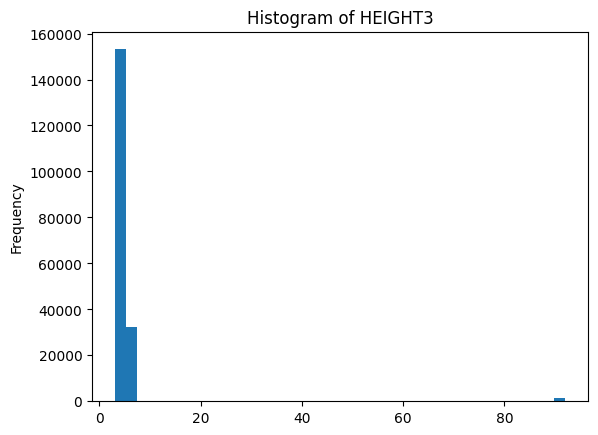

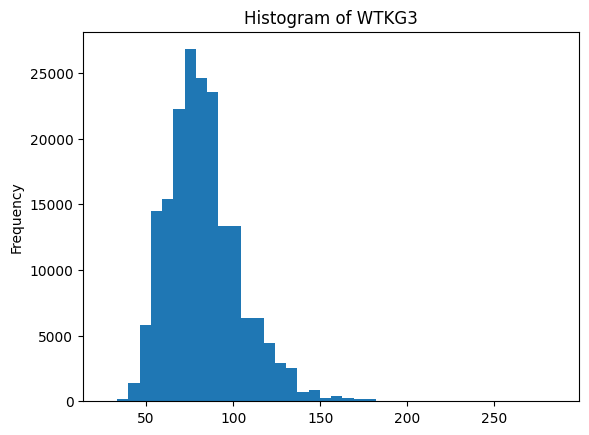

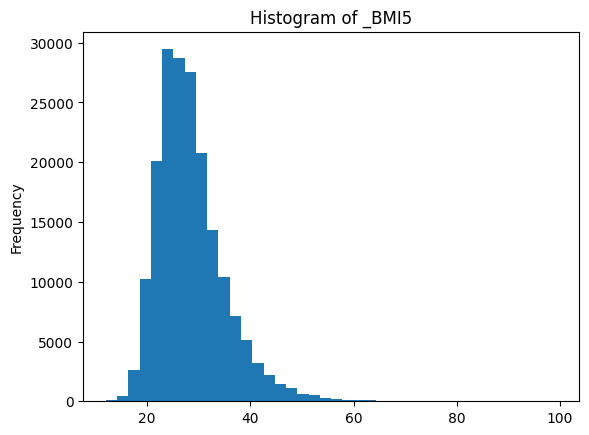

In [175]:
# Plot histogram for these numerical columns
for cols in numerical_columns:
    plt.hist(df[cols], bins=40)
    plt.title(f"Histogram of {cols}")
    plt.ylabel("Frequency")
    plt.show()

The histograms clearly thow that we have potential outliers for Height column as we see some disconnected values at the far right end of the plot.
We also see that Weight and BMI are right skewed probably due to outliers at higer end values.

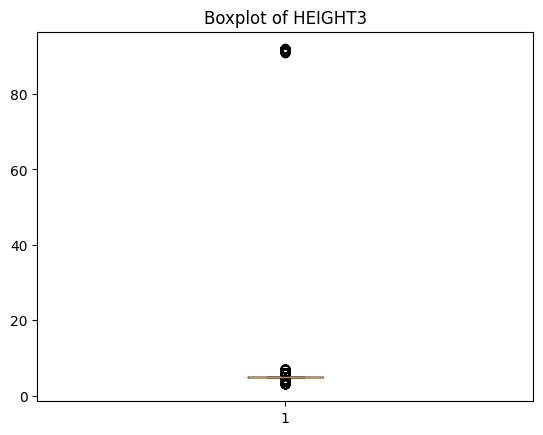

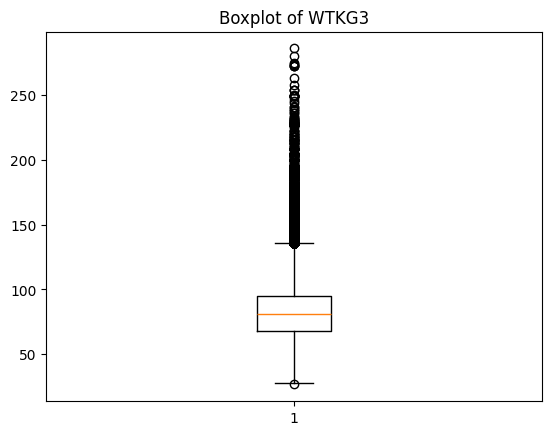

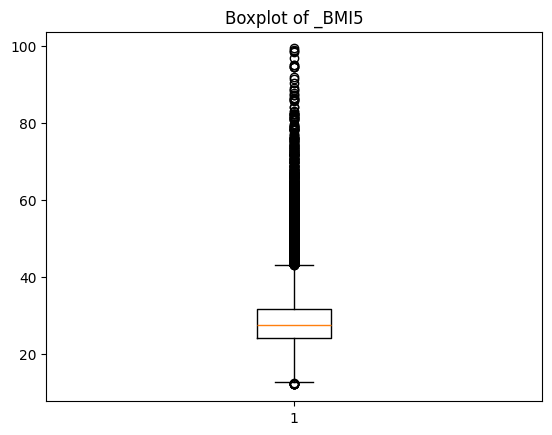

In [176]:
# Lets plot box plot to further check for outliers
for cols in numerical_columns:
    plt.boxplot(df[cols])
    plt.title(f"Boxplot of {cols}")
    plt.show()

In [177]:
# Lets drop anything above 9 feet for height as anything above this value is potential outlier
df = df[df["HEIGHT3"] <= 9]

In [178]:
# Lets drop anything above  for BMI above 60 as anything above this value is potential outlier
df = df[df["_BMI5"] <= 60]

###### COPD dataset

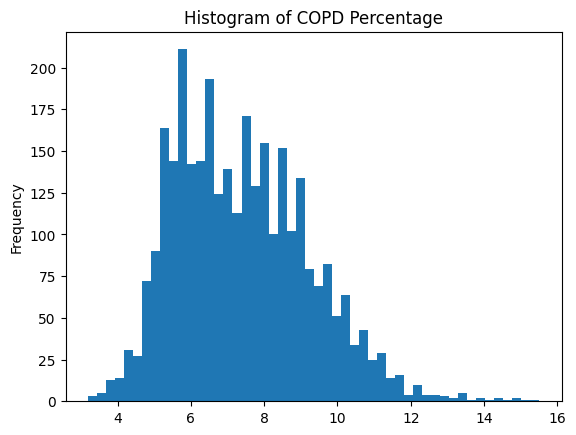

In [179]:
# Plot histogram for percent_copd column
plt.hist(copd_df["percent_copd"], bins=50)
plt.title(f"Histogram of COPD Percentage")
plt.ylabel("Frequency")
plt.show()

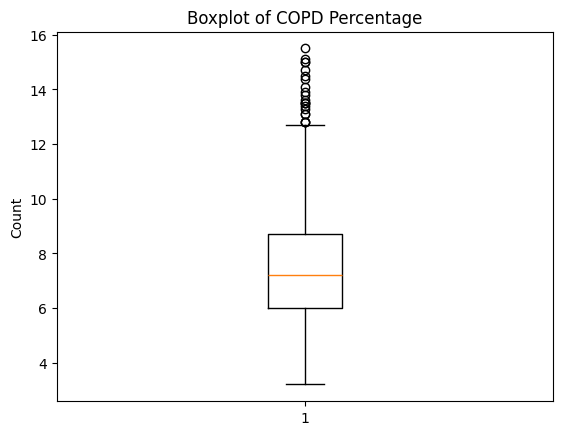

In [180]:
# Plot boxplot for percent_copd column
plt.boxplot(copd_df["percent_copd"])
plt.title(f"Boxplot of COPD Percentage")
plt.ylabel("Count")
plt.show()

In [181]:
# Summary statistics for percent_copd column
copd_df["percent_copd"].describe()

count    3121.000000
mean        7.406216
std         1.835876
min         3.200000
25%         6.000000
50%         7.200000
75%         8.700000
max        15.500000
Name: percent_copd, dtype: float64

From the histogram and box plot we can see that COPD percentage is right skewed and for some couties it is quite high. However these might be valid values as air poolution and repiratory diseases can be higher in some states. Therefore for this study it does not make sense to drop those high cases.

##### Step 6:Clean categorical columns
Check for invalid categories in categorical columns. Missing data or no response from respondents coded as a category 9 in BRFSS dataset. We need to identify invalid data values and clean the ctegorical columns.

In [182]:
# Create a list of categorical columns
categorical_columns = [cols for cols in list(df.columns) if cols not in numerical_columns]

In [183]:
# Check categories and counts for each categorical columns
for cols in categorical_columns:
    print(f"Categries count for {cols} column\n",df.groupby(cols).count()["HEIGHT3"], "\n================================")

Categries count for _LTASTH1 column
 _LTASTH1
1    156097
2     28191
9       657
Name: HEIGHT3, dtype: int64 
Categries count for _CASTHM1 column
 _CASTHM1
1    164282
2     19169
9      1494
Name: HEIGHT3, dtype: int64 
Categries count for _RACE column
 _RACE
1    131049
2     18682
3      1790
4      5314
5       366
6      1964
7      3777
8     18070
9      3933
Name: HEIGHT3, dtype: int64 
Categries count for _SEX column
 _SEX
1    90669
2    94276
Name: HEIGHT3, dtype: int64 
Categries count for _AGE_G column
 _AGE_G
1    12347
2    22478
3    27223
4    29556
5    34560
6    58781
Name: HEIGHT3, dtype: int64 
Categries count for _SMOKER3 column
 _SMOKER3
1     16382
2      6923
3     49301
4    107432
9      4907
Name: HEIGHT3, dtype: int64 
Categries count for _CURECI1 column
 _CURECI1
1    170862
2      9562
9      4521
Name: HEIGHT3, dtype: int64 
Categries count for MMSANAME column
 MMSANAME
Aberdeen, SD, Micropolitan Statistical Area                          610
Akron, OH,

We can that there is "9" for some columns. 9 stands for category where repondents didn't repond to question or missing information. 

In [184]:
# Remove rows with value as 9 in categorical columns
for cols in ["_LTASTH1","_CASTHM1","_RACE","_SMOKER3","_CURECI1"]:
    df = df[df[cols] != 9]

##### Step 7:Extract State Code and County Name from column
Both the datasets have State code and Cointy name name fused together in a single column. Perform transformation to extract and separte the State code and County name in separate columns.

###### BRFSS SMART dataset

In [185]:
df["MMSANAME"].apply(lambda x: x.split(",")[0])

0                           Aberdeen
1                           Aberdeen
2                           Aberdeen
3                           Aberdeen
4                           Aberdeen
                     ...            
227787    Youngstown-Warren-Boardman
227788    Youngstown-Warren-Boardman
227789    Youngstown-Warren-Boardman
227790    Youngstown-Warren-Boardman
227791    Youngstown-Warren-Boardman
Name: MMSANAME, Length: 174009, dtype: object

In [186]:
df["COUNTY"] = df["MMSANAME"].apply(lambda x: x.split(",")[0])

We see that some County names are combined using '-' in the MMSANAME columns, most probably for smaller counties which are too small in size to be consisered as MMSA.

In [187]:
#Split those combined county names and store as a list in a temp_column
df["temp_county"] = df["COUNTY"].str.split("-")

In [188]:
# view temp column values to see it is stored as list of splitted combined names
df["temp_county"]

0                             [Aberdeen]
1                             [Aberdeen]
2                             [Aberdeen]
3                             [Aberdeen]
4                             [Aberdeen]
                       ...              
227787    [Youngstown, Warren, Boardman]
227788    [Youngstown, Warren, Boardman]
227789    [Youngstown, Warren, Boardman]
227790    [Youngstown, Warren, Boardman]
227791    [Youngstown, Warren, Boardman]
Name: temp_county, Length: 174009, dtype: object

In [189]:
#Now as the combined county names is splitted, lets create separate rows for each values of the county names using explode
df = df.explode("temp_county")

In [190]:
# Check last few rows to make sure that the explode worked and now the county names are exploded in separate rows
df.tail()

,HEIGHT3,_LTASTH1,_CASTHM1,_RACE,_SEX,_AGE_G,WTKG3,_BMI5,_SMOKER3,_CURECI1,MMSANAME,COUNTY,temp_county
227790,4.10,1,1,1,2,2,72.57,33.44,3,2,"Youngstown-Warren-Boardman, OH-PA, Metropolita...",Youngstown-Warren-Boardman,Warren
227790,4.10,1,1,1,2,2,72.57,33.44,3,2,"Youngstown-Warren-Boardman, OH-PA, Metropolita...",Youngstown-Warren-Boardman,Boardman
227791,5.09,1,1,1,1,5,88.45,28.80,4,1,"Youngstown-Warren-Boardman, OH-PA, Metropolita...",Youngstown-Warren-Boardman,Youngstown
227791,5.09,1,1,1,1,5,88.45,28.80,4,1,"Youngstown-Warren-Boardman, OH-PA, Metropolita...",Youngstown-Warren-Boardman,Warren
227791,5.09,1,1,1,1,5,88.45,28.80,4,1,"Youngstown-Warren-Boardman, OH-PA, Metropolita...",Youngstown-Warren-Boardman,Boardman


In [191]:
# Replace the county column with the seprated county name
df["COUNTY"] = df["temp_county"].str.strip()
df = df.drop(columns=["temp_county"])

In [192]:
df["STATE"] = df["MMSANAME"].apply(lambda x: x.split(",")[1])

In [193]:
df["STATE"].head(),df["STATE"].tail()

(0     SD
 1     SD
 2     SD
 3     SD
 4     SD
 Name: STATE, dtype: object,
 227790     OH-PA
 227790     OH-PA
 227791     OH-PA
 227791     OH-PA
 227791     OH-PA
 Name: STATE, dtype: object)

We see similiar combined State name with `-`. Lets split into separate rows.

In [194]:
#Split those combined state names and store as a list in a temp_column
df["temp_state"] = df["STATE"].str.split("-")

In [195]:
# view temp column values to see it is stored as list of splitted combined names
df["temp_state"].head(),df["temp_state"].tail()

(0    [ SD]
 1    [ SD]
 2    [ SD]
 3    [ SD]
 4    [ SD]
 Name: temp_state, dtype: object,
 227790    [ OH, PA]
 227790    [ OH, PA]
 227791    [ OH, PA]
 227791    [ OH, PA]
 227791    [ OH, PA]
 Name: temp_state, dtype: object)

In [196]:
#Now as the combined state names is splitted, lets create separate rows for each values of the state names using explode
df = df.explode("temp_state")

In [197]:
# Check first & last few rows to make sure that the explode worked and now the county names are exploded in separate rows
df.head(), df.tail()

(   HEIGHT3  _LTASTH1  _CASTHM1  _RACE  _SEX  _AGE_G   WTKG3  _BMI5  _SMOKER3  \
 0     5.09         1         1      1     1       3  108.86  35.44         3   
 1     6.02         1         1      1     1       4   99.79  28.25         4   
 2     5.07         2         1      1     2       3   74.84  25.84         4   
 3     5.11         1         1      1     1       2   92.99  28.59         4   
 4     5.06         1         1      1     2       5   79.38  28.25         4   
 
    _CURECI1                                     MMSANAME    COUNTY STATE  \
 0         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD   
 1         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD   
 2         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD   
 3         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD   
 4         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD   
 
   temp_state  
 0         SD  
 1         SD  


In [198]:
# Replace the county column with the seprated county name
df["STATE"] = df["temp_state"].str.strip()
df = df.drop(columns=["temp_state"])

In [199]:
df.head(), df.tail()

(   HEIGHT3  _LTASTH1  _CASTHM1  _RACE  _SEX  _AGE_G   WTKG3  _BMI5  _SMOKER3  \
 0     5.09         1         1      1     1       3  108.86  35.44         3   
 1     6.02         1         1      1     1       4   99.79  28.25         4   
 2     5.07         2         1      1     2       3   74.84  25.84         4   
 3     5.11         1         1      1     1       2   92.99  28.59         4   
 4     5.06         1         1      1     2       5   79.38  28.25         4   
 
    _CURECI1                                     MMSANAME    COUNTY STATE  
 0         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD  
 1         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD  
 2         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD  
 3         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD  
 4         1  Aberdeen, SD, Micropolitan Statistical Area  Aberdeen    SD  ,
         HEIGHT3  _LTASTH1  _CASTHM1  _RACE  _SEX  _AGE

###### COPD dataset

In [200]:
copd_df["state"] = copd_df["fullgeoname"].apply(lambda x: x.split(",")[0])

In [201]:
copd_df.head()

,fullgeoname,statedesc,county,percent_copd,state
0,"AL, Autauga",Alabama,Autauga,7.5,AL
1,"AL, Baldwin",Alabama,Baldwin,6.9,AL
2,"AL, Barbour",Alabama,Barbour,10.7,AL
3,"AL, Bibb",Alabama,Bibb,9.2,AL
4,"AL, Blount",Alabama,Blount,8.7,AL


##### Step 8:Agrregate BRFSS SMART dataset for summarizing at County level 
We will need to aggretage to calculate below summary at County level. This is required because all other datasources at county level and our study is being performed at county level but the the BRFSS SMART dataset not at County level. For all the counties we will calculate:
- Average Weight
- Average Height
- Average BMI
- Gender Percentage
- Age Group Percentae
- Race percentage
- Asthma Percentage
- Smoker Percentage
- Ecigarrets Smoker Percentage

In [202]:
df.groupby(["STATE"]).sum("_SEX")["_SEX"]

STATE
AK     2312
AL     3812
AR     8460
AZ    15930
CA    14295
CO    17584
CT    12888
DC    28437
DE     4738
GA    14652
IA    15027
ID     3400
IL    14389
IN    26344
KS    13944
KY     6787
LA     5520
MA    27620
MD    65358
ME     7832
MI    11024
MN    32662
MO    10352
MS     1724
MT      974
NC    18116
ND     2335
NE    14643
NH     5937
NJ    41682
NM     1908
NV      903
NY    66139
OH    16576
OK     3378
OR    12186
PA    10648
PR    10794
RI    13492
SC    20279
SD     7316
TN     8898
TX    21193
UT    12867
VA    37987
VT     6025
WA    27640
WI    45419
WV    37514
Name: _SEX, dtype: int64

,HEIGHT3,_LTASTH1,_CASTHM1,_RACE,_AGE_G,WTKG3,_BMI5,_SMOKER3,_CURECI1,MMSANAME,COUNTY,STATE
0,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216
1,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216
2,274862,274862,274862,274862,274862,274862,274862,274862,274862,274862,274862,274862
3,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216
4,274862,274862,274862,274862,274862,274862,274862,274862,274862,274862,274862,274862
...,...,...,...,...,...,...,...,...,...,...,...,...
227791,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216
227791,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216
227791,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216
227791,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216,260216


In [221]:
def calculate_percentage(data):
    return data.count()["COUNTY"]/data.shape[0]

In [222]:
df.groupby(["STATE","_SEX"]).apply(calculate_percentage)

STATE  _SEX
AK     1       1.0
       2       1.0
AL     1       1.0
       2       1.0
AR     1       1.0
              ... 
WA     2       1.0
WI     1       1.0
       2       1.0
WV     1       1.0
       2       1.0
Length: 98, dtype: float64

In [205]:
df[df["STATE"] == "AK"].groupby("_SEX").describe()

HEIGHT3                                                   _LTASTH1  \
       count      mean       std   min   25%   50%   75%   max    count   
_SEX                                                                      
1      804.0  5.432575  0.453389  5.01  5.08  5.10  6.00  7.01    804.0   
2      754.0  5.026645  0.211047  4.07  5.03  5.04  5.07  6.05    754.0   

                ... _SMOKER3      _CURECI1                                     \
          mean  ...      75%  max    count      mean       std  min  25%  50%   
_SEX            ...                                                             
1     1.134328  ...      4.0  4.0    804.0  1.062189  0.241649  1.0  1.0  1.0   
2     1.152520  ...      4.0  4.0    754.0  1.046419  0.210531  1.0  1.0  1.0   

                
      75%  max  
_SEX            
1     1.0  2.0  
2     1.0  2.0  

[2 rows x 72 columns]

##### Step 9:Merge BRFSS dataframe and COPD dataframe on County and State name to create a single dataframe
We will need to merge the BRFSS dataframe and COPD dataframe in order to have a single dataframe containing both COPD prevalence and Asthma prevalencae 

#### Ethical Implications

The BRFSS SMART and COPD prevalence datasets do not contain personally identifiable data, and there is no risk of data privacy breaches. These open datasets are freely available for use and redistribution without restrictions. These datasets do not contain any licensed data or copyrighted data. The COPD dataset contains estimated COPD prevalence, which deviates from the actual COPD prevalence, and the outcomes of this study may not be an exact representation of the population. As part of data wrangling, records in the BRFSS SMART dataset where respondents didn't provide responses or missing data have been dropped. Therefore, the sample may not be an accurate representation of the population. For some records in the BRFSS SMART dataset, the County and State of respondents are combined into one record. As part of data wrangling,  such records were split into multiple records with the assumption that the same record belongs to each separate County and State, and the records are combined because the respondent's location does not belong to a single County. This approach and assumption may not be an actual case, and oversampling the records in this approach may introduce bias. Hence, outcomes may not be an exact representation of the population. Response records in the BRFSS SMART dataset are aggregated at the County and State levels to calculate the prevalence percentages and averages. These prevalence percentages and averages may not represent the population because not all residents participated in the survey, and information that was missing was dropped for this study.

## References
About BRFSS. (n.d.). _CDC_. **https://www.cdc.gov/brfss/about/index.htm**